# *AIML CA1 PART B: REGRESSION*

In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('housing_dataset.csv', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'housing_dataset.csv'

In [ ]:
data.head()

,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
House ID,,,,,,,
0,Chicago,742.0,4,2,3,furnished,1330000
1,Denver,896.0,4,4,4,furnished,1225000
2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,Seattle,750.0,4,2,2,furnished,1221500
4,New York,742.0,4,1,2,furnished,1141000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               545 non-null    object 
 1   House Area (sqm)   545 non-null    float64
 2   No. of Bedrooms    545 non-null    int64  
 3   No. of Toilets     545 non-null    int64  
 4   Stories            545 non-null    int64  
 5   Renovation Status  545 non-null    object 
 6   Price ($)          545 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 34.1+ KB


In [ ]:
data.describe()

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($)
count,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,515.054128,2.965138,1.286239,1.805505,4.766729e+05
std,217.014102,0.738064,0.502470,0.867492,1.870440e+05
min,165.000000,1.000000,1.000000,1.000000,1.750000e+05
25%,360.000000,2.000000,1.000000,1.000000,3.430000e+05
50%,460.000000,3.000000,1.000000,2.000000,4.340000e+05
75%,636.000000,3.000000,2.000000,2.000000,5.740000e+05
max,1620.000000,6.000000,4.000000,4.000000,1.330000e+06


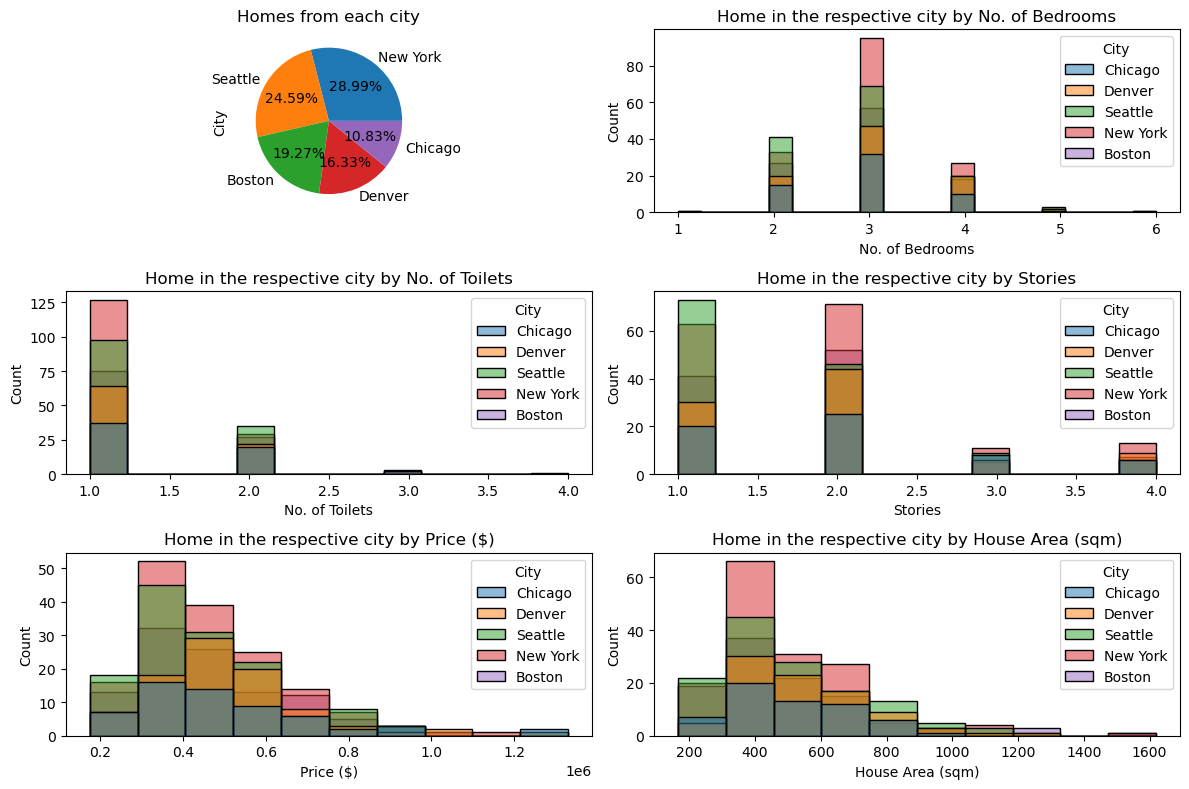

In [ ]:
fig, axes = plt.subplots(3,2 , figsize=(12, 8))

data['City'].value_counts().plot(kind = 'pie',autopct = '%1.2f%%', ax=axes[0,0])
axes[0,0].set_title('Homes from each city')

sns.histplot(data=data, x='No. of Bedrooms', hue='City', ax=axes[0, 1])
axes[0, 1].set_title('Home in the respective city by No. of Bedrooms')

sns.histplot(data=data, x='No. of Toilets', hue='City', ax=axes[1, 0])
axes[1, 0].set_title('Home in the respective city by No. of Toilets')

sns.histplot(data=data, x='Stories', hue='City', ax=axes[1, 1])
axes[1, 1].set_title('Home in the respective city by Stories')

sns.histplot(data=data, x='Price ($)', hue='City', bins = 10, ax=axes[2, 0])
axes[2,0].set_title('Home in the respective city by Price ($)')

sns.histplot(data=data, x='House Area (sqm)', hue='City', bins=10, ax=axes[2,1])
axes[2,1].set_title('Home in the respective city by House Area (sqm)')


plt.tight_layout()
plt.show()

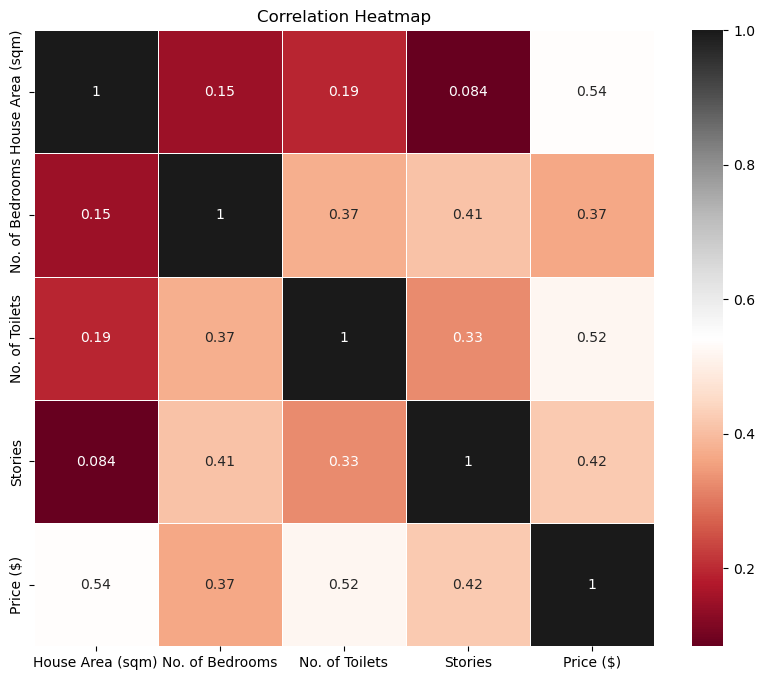

In [ ]:
# Computing the correlation matrix
corr_matrix = data.corr()

# Creating a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdGy', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data.head()

,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
House ID,,,,,,,
0,Chicago,742.0,4,2,3,furnished,1330000
1,Denver,896.0,4,4,4,furnished,1225000
2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,Seattle,750.0,4,2,2,furnished,1221500
4,New York,742.0,4,1,2,furnished,1141000


In [ ]:
# Feature engineering
data['Price/sqm'] = data["Price ($)"] / data['House Area (sqm)']

# Perform one-hot encoding
dummies = pd.get_dummies(data[["City", "Renovation Status"]], drop_first=True)

# Concatenate the original data with the encoded dummies
data_enc = pd.concat([data, dummies], axis=1)

# Create a subset to be dropped
to_drop = ["City", "Renovation Status"]

#Drop the data for feature selection
data_enc = data_enc.drop(to_drop, axis = 1)

In [ ]:
data_enc.head()

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($),Price/sqm,City_Chicago,City_Denver,City_New York,City_Seattle,Renovation Status_semi-furnished,Renovation Status_unfurnished
House ID,,,,,,,,,,,,
0,742.0,4,2,3,1330000,1792.452830,1,0,0,0,0,0
1,896.0,4,4,4,1225000,1367.187500,0,1,0,0,0,0
2,996.0,3,2,2,1225000,1229.919679,1,0,0,0,1,0
3,750.0,4,2,2,1221500,1628.666667,0,0,0,1,0,0
4,742.0,4,1,2,1141000,1537.735849,0,0,1,0,0,0


In [ ]:
# Split the data - train and test
from sklearn.model_selection import train_test_split
x = data_enc.drop("Price ($)", axis=1).values
y = data_enc['Price ($)'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
# Create a MinMaxScaler object
from sklearn.preprocessing import MinMaxScaler


# Scale the necessary columns
to_scale = ['House Area (sqm)', 'Price/sqm']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the numerical columns in the train and test datasets
x_train  = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

dummy = DummyRegressor(strategy='mean')

dummy.fit(x_train, y_train)

y_pred = dummy.predict(x_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

r_squared = dummy.score(x_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

Predictions: [479266.35091743 479266.35091743], Actual Values: [315000 399000]
R^2: -0.005121500831450909
RMSE: 181658.0078619626


In [ ]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

regressors = {
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "LinearSVR": LinearSVR(),
    "KernelRidge": KernelRidge(),
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    "TheilSenRegressor": TheilSenRegressor(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}

df_models = pd.DataFrame(columns=['model', 'rmse', 'rmse_cv'])

for key in regressors:

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    scores = cross_val_score(model, 
                             x_train, 
                             y_train,
                             scoring="neg_mean_squared_error", 
                             cv=10)

    row = {'model': key,
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred))),
           'rmse_cv': round(np.mean(np.sqrt(-scores)))
    }

    df_models = df_models.append(row, ignore_index=True)

    df_models.head(20).sort_values(by='rmse_cv', ascending=True)

* RandomForestRegressor


C:\Users\3mm3t\AppData\Local\Temp\ipykernel_16520\2020539728.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\3mm3t\AppData\Local\Temp\ipykernel_16520\2020539728.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\3mm3t\AppData\Local\Temp\ipykernel_16520\2020539728.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR


C:\Users\3mm3t\AppData\Local\Temp\ipykernel_16520\2020539728.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\3mm3t\AppData\Local\Temp\ipykernel_16520\2020539728.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\3mm3t\AppData\Local\Temp\ipykernel_16520\2020539728.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\3mm3t\AppData\Local\Temp\ipykernel_16520\2020539728.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(

* NuSVR
* LinearSVR
* KernelRidge
* LinearRegression
* Ridge
* Lars
* TheilSenRegressor


C:\Users\3mm3t\AppData\Local\Temp\ipykernel_16520\2020539728.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\3mm3t\AppData\Local\Temp\ipykernel_16520\2020539728.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* HuberRegressor
* PassiveAggressiveRegressor


c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\linea

* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


C:\Users\3mm3t\AppData\Local\Temp\ipykernel_16520\2020539728.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\3mm3t\AppData\Local\Temp\ipykernel_16520\2020539728.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\3mm3t\AppData\Local\Temp\ipykernel_16520\2020539728.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


In [ ]:
df_models.head(20).sort_values(by='rmse_cv', ascending=True)

,model,run_time,rmse,rmse_cv
2,GaussianProcessRegressor,0.0,110243,13094
0,RandomForestRegressor,0.03,85351,42378
1,DecisionTreeRegressor,0.0,123650,53580
7,LinearRegression,0.0,123418,80063
9,Lars,0.0,123418,80325
10,TheilSenRegressor,0.08,132927,81647
6,KernelRidge,0.0,107742,83555
8,Ridge,0.0,105958,85152
11,HuberRegressor,0.0,118317,131032
15,ElasticNet,0.0,166468,172242


In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, r2_score

regressor = GaussianProcessRegressor()
model = regressor.fit(x_train, y_train)
y_pred = model.predict(x_test)
 
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

NameError: name 'x_train' is not defined

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import GridSearchCV

# Instantiate the model
model = GaussianProcessRegressor()

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.01, 0.001],
    'optimizer': ['fmin_l_bfgs_b', 'fmin_tnc'],
    'n_restarts_optimizer': [5, 10],
    'normalize_y': [True, False],
    'random_state': [42, 123]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error')

# Fit the grid search
best_model = grid_search.fit(x_train, y_train)

# Print the best parameters
print('Optimum parameters:', best_model.best_params_)



Optimum parameters: {'alpha': 0.001, 'n_restarts_optimizer': 5, 'normalize_y': True, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 42}


c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py", line 222, in fit
    self._validate_params()
  File "c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\3mm3t\anaconda3\lib\site